In [1]:
import pandas as pd

# 读取文件
df = pd.read_excel("text_passed.xlsx")
df.head()

,model,医師,歯科,看護,理学,作業,保健,助産,診療,視能,薬剤,total
0,Qwen2-VL-72B-Instruct,0,0,0,0,0,0,0,0,0,0,0
1,Qwen2-VL-7B-Instruct,0,0,0,0,0,0,0,0,0,0,0
2,Qwen2.5-7B-Instruct,0,0,0,0,0,0,0,0,0,0,0
3,QwQ-32B-preview,0,0,0,0,0,0,0,0,0,0,0
4,Qwen2.5-0.5B-Instruct,0,0,0,0,0,0,0,0,0,0,0


In [2]:
# 日文列到英文的映射
rename_dict = {
    "医師": "Medicine",
    "歯科": "Dentistry",
    "看護": "Nursing",
    "理学": "Physical Therapy",
    "作業": "Occupational Therapy",
    "保健": "Public Health Nursing",
    "助産": "Midwifery",
    "診療": "Radiologic Technology",
    "視能": "Optometry",
    "薬剤": "Pharmacy"
}

# 重命名列
df = df.rename(columns=rename_dict)
df.head()

,model,Medicine,Dentistry,Nursing,Physical Therapy,Occupational Therapy,Public Health Nursing,Midwifery,Radiologic Technology,Optometry,Pharmacy,total
0,Qwen2-VL-72B-Instruct,0,0,0,0,0,0,0,0,0,0,0
1,Qwen2-VL-7B-Instruct,0,0,0,0,0,0,0,0,0,0,0
2,Qwen2.5-7B-Instruct,0,0,0,0,0,0,0,0,0,0,0
3,QwQ-32B-preview,0,0,0,0,0,0,0,0,0,0,0
4,Qwen2.5-0.5B-Instruct,0,0,0,0,0,0,0,0,0,0,0


In [3]:
# 选取10个专业列
subject_cols = list(rename_dict.values())

# 找出所有10科成绩都是0的模型行
zero_score_models = df[df[subject_cols].sum(axis=1) == 0]

# 输出这些模型的名字
zero_score_model_names = zero_score_models['model'].tolist()
print("全为 0 分的模型有：", zero_score_model_names)

全为 0 分的模型有： ['Qwen2-VL-72B-Instruct', 'Qwen2-VL-7B-Instruct', 'Qwen2.5-7B-Instruct', 'QwQ-32B-preview', 'Qwen2.5-0.5B-Instruct', 'Qwen2.5-3B-Instruct', 'QVQ-72B-preview', 'Qwen2.5-1.5B-Instruct', 'Qwen2-VL-2B-Instruct', 'DeepSeek-V2.5-1210', 'Llama-3.1-70B-Instruct', 'Llama-3.1-8B-Instruct', 'Llama-3.2-1B-Instruct', 'Llama-3.2-3B-Instruct', 'gemma-2-2b-jpn-it', 'gemma-2-2b-it', 'gemma-2-9b-it', 'gpt-3.5-turbo', 'Pixtral-12B-2409', 'phi-4', 'Phi-3.5-vision-instruct']


In [4]:
# 删除全为 0 分的模型
df_nozero = df[~df['model'].isin(zero_score_model_names)]

# 保存为 Excel 文件
df_nozero.to_excel("text_nozero.xlsx", index=False)
print("新文件已保存为 text_nozero.xlsx")

新文件已保存为 text_nozero.xlsx


In [5]:
import pandas as pd

# 读取数据
df = pd.read_excel("multimodal_passed.xlsx")
df.head()

,model,医師,歯科,看護,理学,作業,保健,助産,診療,視能,薬剤,total
0,Qwen2-VL-7B-Instruct,0,0,0,0,0,0,0,0,0,0,0
1,QVQ-72B-preview,0,0,0,0,0,0,0,0,0,0,0
2,Qwen2-VL-2B-Instruct,0,0,0,0,0,0,0,0,0,0,0
3,Pixtral-12B-2409,0,0,0,0,0,0,0,0,0,0,0
4,Phi-3.5-vision-instruct,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# 定义列名映射字典：日文 → 英文专业名
rename_dict = {
    "医師": "Medicine",
    "歯科": "Dentistry",
    "看護": "Nursing",
    "理学": "Physical Therapy",
    "作業": "Occupational Therapy",
    "保健": "Public Health Nursing",
    "助産": "Midwifery",
    "診療": "Radiologic Technology",
    "視能": "Optometry",
    "薬剤": "Pharmacy"
}

# 重命名列
df = df.rename(columns=rename_dict)
df.head()

,model,Medicine,Dentistry,Nursing,Physical Therapy,Occupational Therapy,Public Health Nursing,Midwifery,Radiologic Technology,Optometry,Pharmacy,total
0,Qwen2-VL-7B-Instruct,0,0,0,0,0,0,0,0,0,0,0
1,QVQ-72B-preview,0,0,0,0,0,0,0,0,0,0,0
2,Qwen2-VL-2B-Instruct,0,0,0,0,0,0,0,0,0,0,0
3,Pixtral-12B-2409,0,0,0,0,0,0,0,0,0,0,0
4,Phi-3.5-vision-instruct,0,0,0,0,0,0,0,0,0,0,0


In [7]:
# 10 个专业列名
subject_cols = list(rename_dict.values())

# 找出所有这 10 个考试都为 0 的模型
zero_score_models = df[df[subject_cols].sum(axis=1) == 0]

# 获取这些模型的名称
zero_model_names = zero_score_models["model"].tolist()

# 打印模型名称
print("全为 0 分的模型有：")
for name in zero_model_names:
    print(name)

全为 0 分的模型有：
Qwen2-VL-7B-Instruct
QVQ-72B-preview
Qwen2-VL-2B-Instruct
Pixtral-12B-2409
Phi-3.5-vision-instruct


In [8]:
# 删除这些模型
df_nozero = df[~df["model"].isin(zero_model_names)]

# 保存为新的 Excel 文件
df_nozero.to_excel("multimodal_nozero.xlsx", index=False)
print("已保存为 'multimodal_nozero.xlsx'")

已保存为 'multimodal_nozero.xlsx'


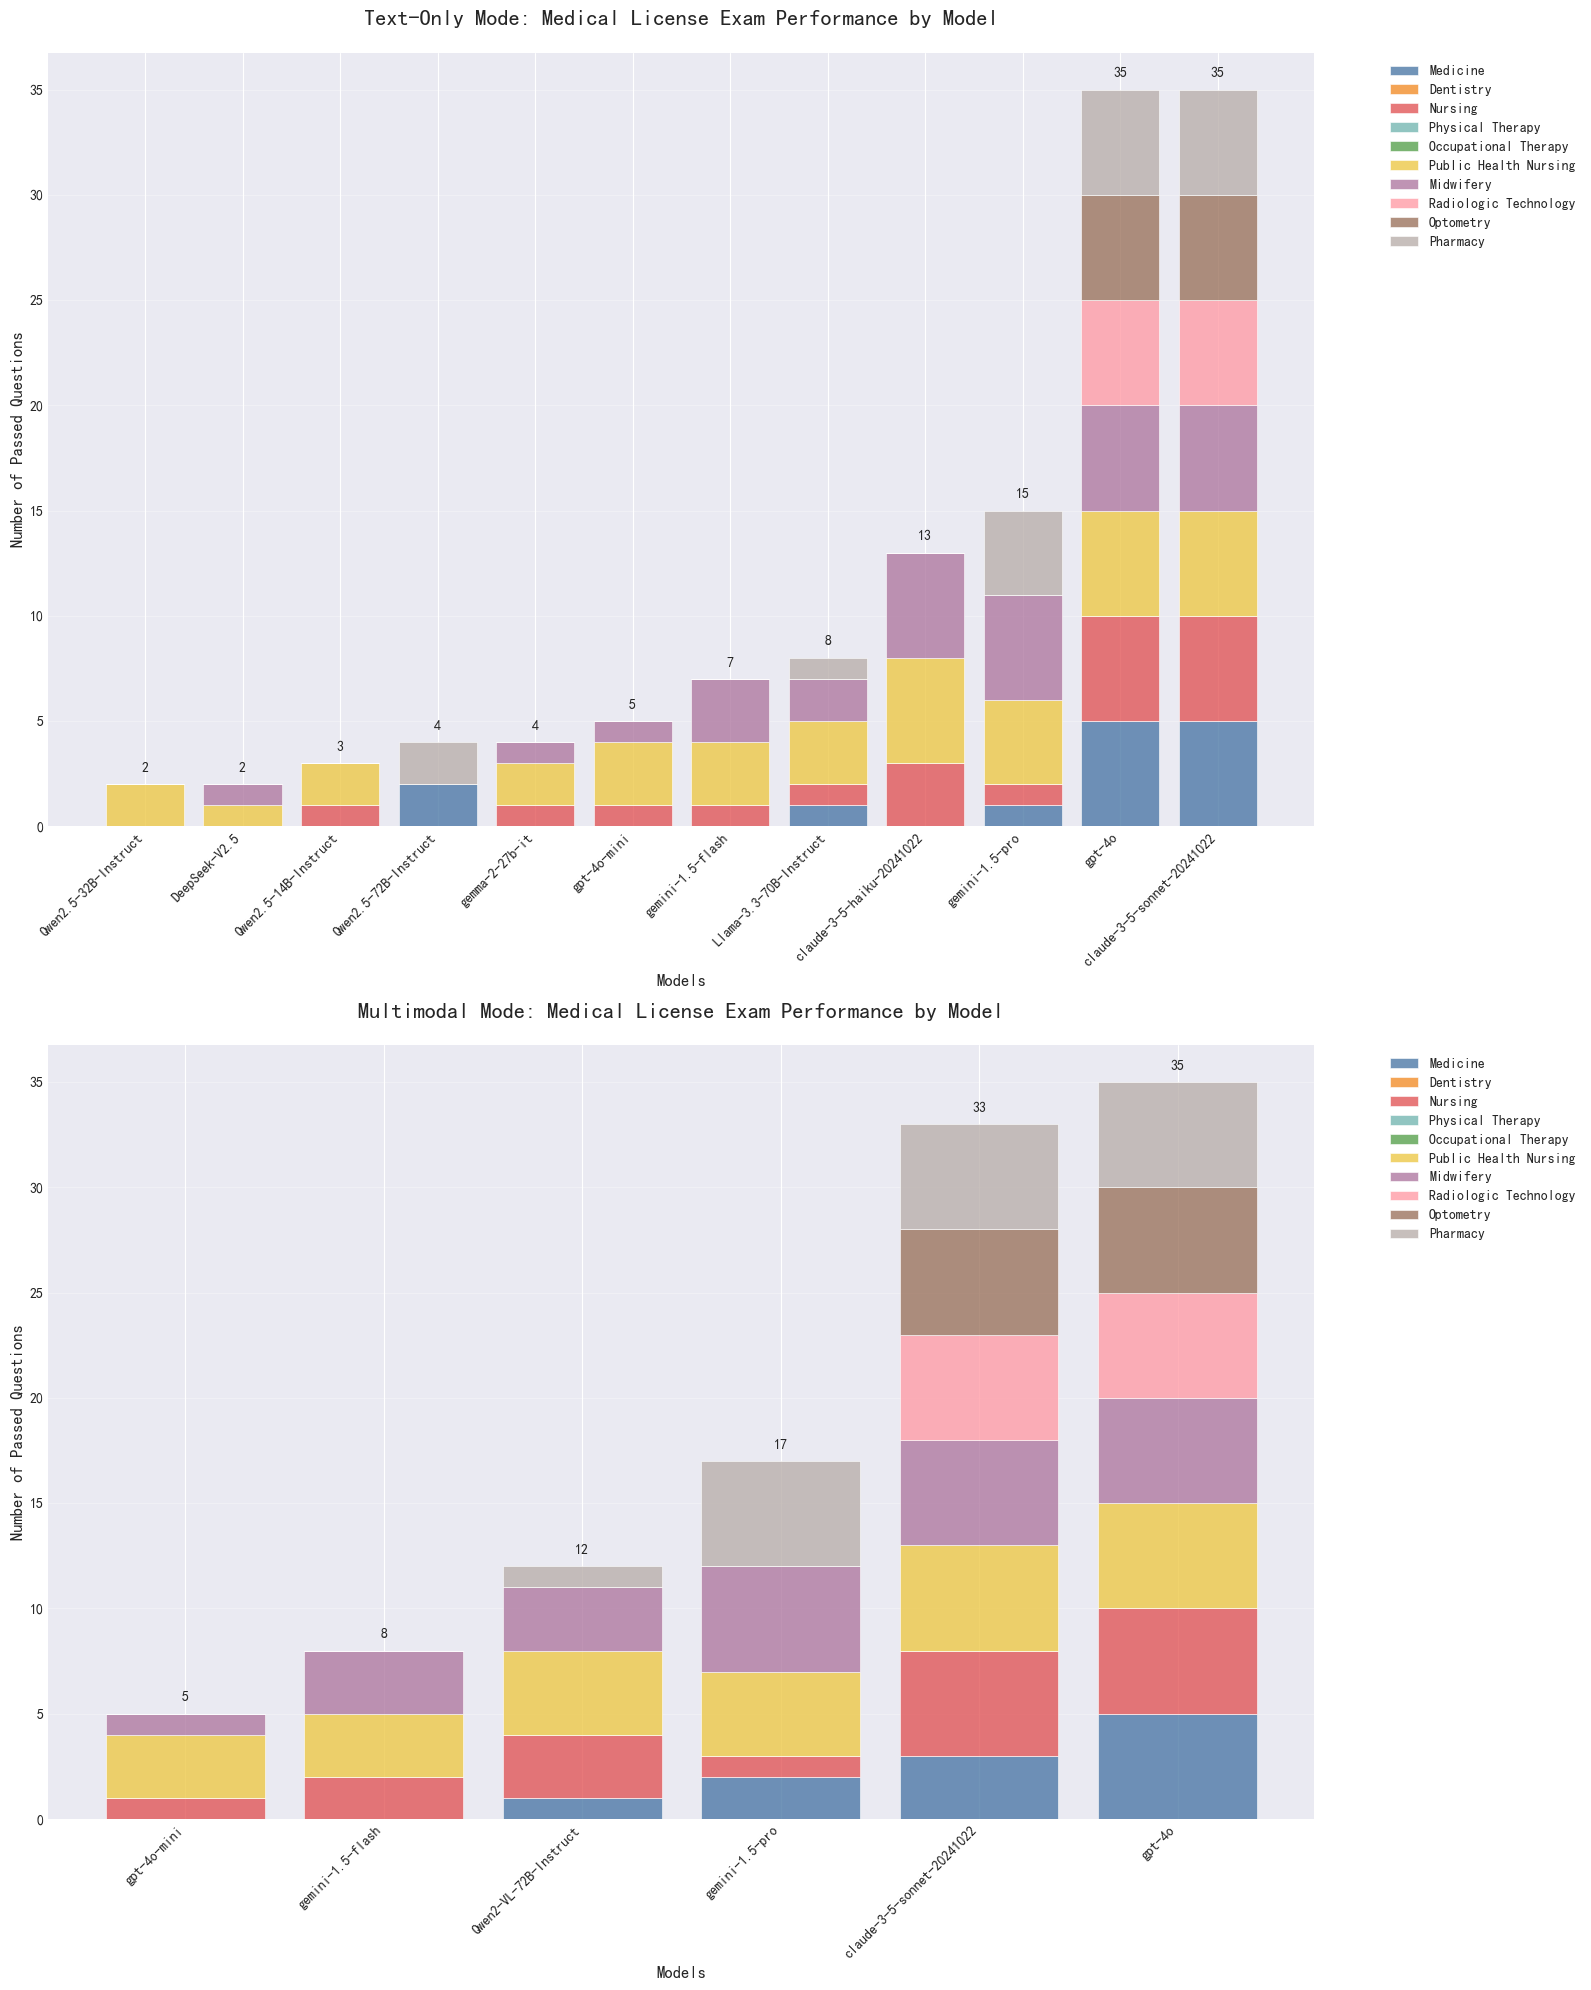

=== Text-Only Mode Statistics ===
Total models evaluated: 33
Models with zero scores: 21
Models with non-zero scores: 12
Best performing model: gpt-4o (Score: 35)

=== Multimodal Mode Statistics ===
Total models evaluated: 11
Models with zero scores: 5
Models with non-zero scores: 6
Best performing model: gpt-4o (Score: 35)

=== Performance Comparison ===
Models tested in both modes: 11
claude-3-5-sonnet-20241022: Text=35, Multimodal=33, Difference=-2
gpt-4o: Text=35, Multimodal=35, Difference=+0
gpt-4o-mini: Text=5, Multimodal=5, Difference=+0
Qwen2-VL-72B-Instruct: Text=0, Multimodal=12, Difference=+12
gemini-1.5-pro: Text=15, Multimodal=17, Difference=+2
gemini-1.5-flash: Text=7, Multimodal=8, Difference=+1


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import rcParams

# 设置中文字体和样式
plt.style.use('seaborn-darkgrid')
rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
rcParams['axes.unicode_minus'] = False

# 日文到英文的映射
rename_dict = {
    "医師": "Medicine",
    "歯科": "Dentistry", 
    "看護": "Nursing",
    "理学": "Physical Therapy",
    "作業": "Occupational Therapy",
    "保健": "Public Health Nursing",
    "助産": "Midwifery",
    "診療": "Radiologic Technology",
    "視能": "Optometry",
    "薬剤": "Pharmacy"
}

# Text-only 数据
text_data = {
    'model': ['Qwen2-VL-72B-Instruct', 'Qwen2-VL-7B-Instruct', 'Qwen2.5-7B-Instruct', 'QwQ-32B-preview', 
              'Qwen2.5-0.5B-Instruct', 'Qwen2.5-3B-Instruct', 'QVQ-72B-preview', 'Qwen2.5-1.5B-Instruct',
              'Qwen2-VL-2B-Instruct', 'DeepSeek-V2.5-1210', 'Llama-3.1-70B-Instruct', 'Llama-3.1-8B-Instruct',
              'Llama-3.2-1B-Instruct', 'Llama-3.2-3B-Instruct', 'gemma-2-2b-jpn-it', 'gemma-2-2b-it',
              'gemma-2-9b-it', 'gpt-3.5-turbo', 'Pixtral-12B-2409', 'phi-4', 'Phi-3.5-vision-instruct',
              'Qwen2.5-32B-Instruct', 'DeepSeek-V2.5', 'Qwen2.5-14B-Instruct', 'Qwen2.5-72B-Instruct',
              'gemma-2-27b-it', 'gpt-4o-mini', 'gemini-1.5-flash', 'Llama-3.3-70B-Instruct',
              'claude-3-5-haiku-20241022', 'gemini-1.5-pro', 'gpt-4o', 'claude-3-5-sonnet-20241022'],
    '医師': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,1,5,5],
    '歯科': [0]*33,
    '看護': [0]*21 + [0,0,1,0,1,1,1,1,3,1,5,5],
    '理学': [0]*33,
    '作業': [0]*33,
    '保健': [0]*21 + [2,1,2,0,2,3,3,3,5,4,5,5],
    '助産': [0]*21 + [0,1,0,0,1,1,3,2,5,5,5,5],
    '診療': [0]*28 + [0,0,0,5,5],
    '視能': [0]*28 + [0,0,0,5,5],
    '薬剤': [0]*21 + [0,0,0,2,0,0,0,1,0,4,5,5],
    'total': [0]*21 + [2,2,3,4,4,5,7,8,13,15,35,35]
}

# Multimodal 数据
multimodal_data = {
    'model': ['Qwen2-VL-7B-Instruct', 'QVQ-72B-preview', 'Qwen2-VL-2B-Instruct', 'Pixtral-12B-2409',
              'Phi-3.5-vision-instruct', 'gpt-4o-mini', 'gemini-1.5-flash', 'Qwen2-VL-72B-Instruct',
              'gemini-1.5-pro', 'claude-3-5-sonnet-20241022', 'gpt-4o'],
    '医師': [0,0,0,0,0,0,0,1,2,3,5],
    '歯科': [0]*11,
    '看護': [0,0,0,0,0,1,2,3,1,5,5],
    '理学': [0]*11,
    '作業': [0]*11,
    '保健': [0,0,0,0,0,3,3,4,4,5,5],
    '助産': [0,0,0,0,0,1,3,3,5,5,5],
    '診療': [0]*6 + [0,0,0,5,5],
    '視能': [0]*6 + [0,0,0,5,5],
    '薬剤': [0,0,0,0,0,0,0,1,5,5,5],
    'total': [0,0,0,0,0,5,8,12,17,33,35]
}

# 创建DataFrame
df_text = pd.DataFrame(text_data)
df_multimodal = pd.DataFrame(multimodal_data)

# 重命名列
df_text = df_text.rename(columns=rename_dict)
df_multimodal = df_multimodal.rename(columns=rename_dict)

# 选择有分数的模型进行可视化
df_text_filtered = df_text[df_text['total'] > 0].copy()
df_multimodal_filtered = df_multimodal[df_multimodal['total'] > 0].copy()

# 创建图表
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 20))

# 考试科目（排除total列）
subjects = [col for col in df_text_filtered.columns if col not in ['model', 'total']]

# Text-only 模式图表
text_scores = df_text_filtered[subjects].values
x_pos_text = np.arange(len(df_text_filtered))

# 创建堆叠条形图
# colors = plt.cm.Set3(np.linspace(0, 1, len(subjects)))
colors = [
    '#4E79A7', '#F28E2B', '#E15759', '#76B7B2',
    '#59A14F', '#EDC948', '#B07AA1', '#FF9DA7',
    '#9C755F', '#BAB0AC'
]

bottom_text = np.zeros(len(df_text_filtered))

for i, subject in enumerate(subjects):
    values = df_text_filtered[subject].values
    ax1.bar(x_pos_text, values, bottom=bottom_text, label=subject, 
            color=colors[i], alpha=0.8, edgecolor='white', linewidth=0.5)
    bottom_text += values

ax1.set_title('Text-Only Mode: Medical License Exam Performance by Model', 
              fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Models', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Passed Questions', fontsize=12, fontweight='bold')
ax1.set_xticks(x_pos_text)
ax1.set_xticklabels(df_text_filtered['model'], rotation=45, ha='right')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(axis='y', alpha=0.3)

# 添加总分标签
for i, total in enumerate(df_text_filtered['total']):
    ax1.text(i, total + 0.5, str(total), ha='center', va='bottom', fontweight='bold')

# Multimodal 模式图表
multimodal_scores = df_multimodal_filtered[subjects].values
x_pos_multi = np.arange(len(df_multimodal_filtered))

bottom_multi = np.zeros(len(df_multimodal_filtered))

for i, subject in enumerate(subjects):
    values = df_multimodal_filtered[subject].values
    ax2.bar(x_pos_multi, values, bottom=bottom_multi, label=subject, 
            color=colors[i], alpha=0.8, edgecolor='white', linewidth=0.5)
    bottom_multi += values

ax2.set_title('Multimodal Mode: Medical License Exam Performance by Model', 
              fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Models', fontsize=12, fontweight='bold')
ax2.set_ylabel('Number of Passed Questions', fontsize=12, fontweight='bold')
ax2.set_xticks(x_pos_multi)
ax2.set_xticklabels(df_multimodal_filtered['model'], rotation=45, ha='right')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(axis='y', alpha=0.3)

# 添加总分标签
for i, total in enumerate(df_multimodal_filtered['total']):
    ax2.text(i, total + 0.5, str(total), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# 打印统计信息
print("=== Text-Only Mode Statistics ===")
print(f"Total models evaluated: {len(df_text)}")
print(f"Models with zero scores: {len(df_text[df_text['total'] == 0])}")
print(f"Models with non-zero scores: {len(df_text_filtered)}")
print(f"Best performing model: {df_text_filtered.loc[df_text_filtered['total'].idxmax(), 'model']} (Score: {df_text_filtered['total'].max()})")

print("\n=== Multimodal Mode Statistics ===")
print(f"Total models evaluated: {len(df_multimodal)}")
print(f"Models with zero scores: {len(df_multimodal[df_multimodal['total'] == 0])}")
print(f"Models with non-zero scores: {len(df_multimodal_filtered)}")
print(f"Best performing model: {df_multimodal_filtered.loc[df_multimodal_filtered['total'].idxmax(), 'model']} (Score: {df_multimodal_filtered['total'].max()})")

# 创建对比分析
print("\n=== Performance Comparison ===")
# 找到在两种模式下都有数据的模型
common_models = set(df_text['model']) & set(df_multimodal['model'])
print(f"Models tested in both modes: {len(common_models)}")

for model in common_models:
    text_score = df_text[df_text['model'] == model]['total'].iloc[0]
    multi_score = df_multimodal[df_multimodal['model'] == model]['total'].iloc[0]
    if text_score > 0 or multi_score > 0:
        diff = multi_score - text_score
        print(f"{model}: Text={text_score}, Multimodal={multi_score}, Difference={diff:+d}")

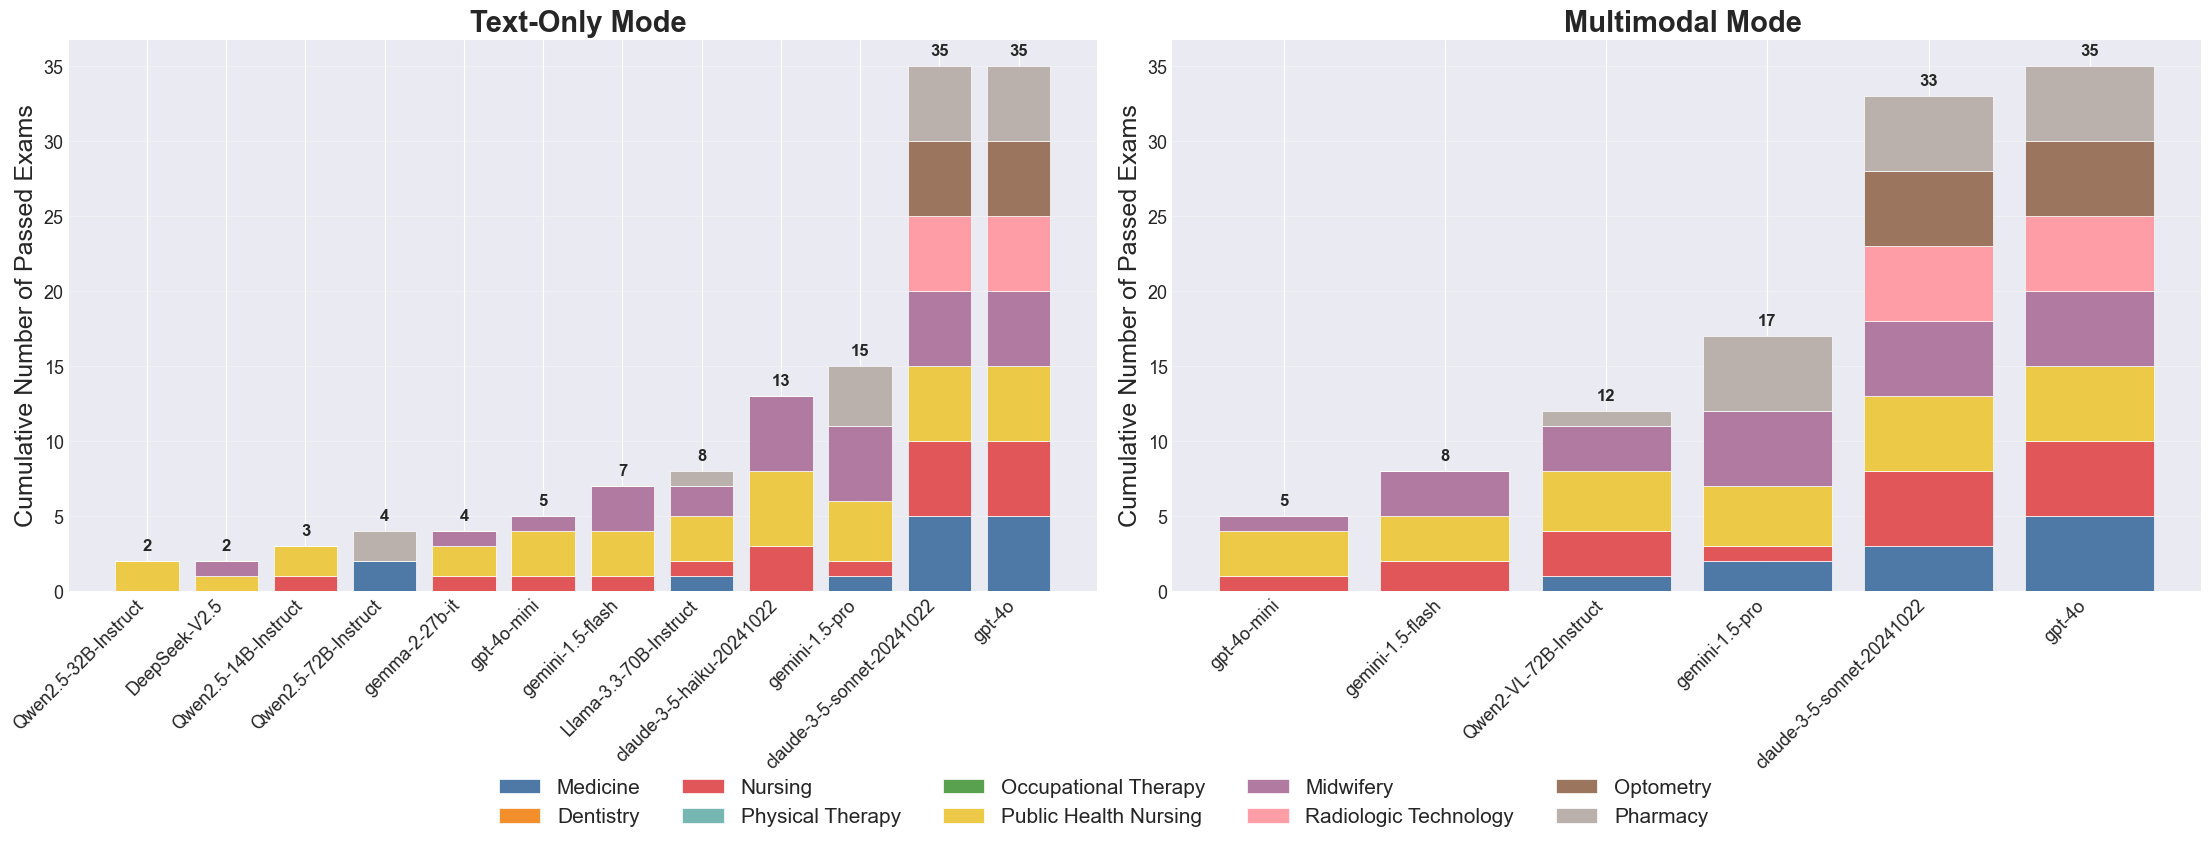

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# 设置中文字体和样式
plt.style.use('seaborn-darkgrid')
rcParams['font.family'] = 'Arial'  # 强制使用 Arial
rcParams['axes.unicode_minus'] = False

# 日文到英文的映射
rename_dict = {
    "医師": "Medicine",
    "歯科": "Dentistry", 
    "看護": "Nursing",
    "理学": "Physical Therapy",
    "作業": "Occupational Therapy",
    "保健": "Public Health Nursing",
    "助産": "Midwifery",
    "診療": "Radiologic Technology",
    "視能": "Optometry",
    "薬剤": "Pharmacy"
}


# 创建DataFrame并重命名列
df_text = pd.DataFrame(text_data).rename(columns=rename_dict)
df_multimodal = pd.DataFrame(multimodal_data).rename(columns=rename_dict)

# 选择有分数的模型
df_text_filtered = df_text[df_text['total'] > 0].copy()
# 将 gpt-4o 行移动到最后
df_text_filtered = pd.concat([
    df_text_filtered[df_text_filtered['model'] != 'gpt-4o'],
    df_text_filtered[df_text_filtered['model'] == 'gpt-4o']
])

df_multimodal_filtered = df_multimodal[df_multimodal['total'] > 0].copy()

# 考试科目（排除total列）
subjects = [col for col in df_text_filtered.columns if col not in ['model', 'total']]
colors = [
    '#4E79A7', '#F28E2B', '#E15759', '#76B7B2',
    '#59A14F', '#EDC948', '#B07AA1', '#FF9DA7',
    '#9C755F', '#BAB0AC'
]


# 设置图像大小和风格（并排）
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 8), constrained_layout=True)

# ========================= Text-only 图 =========================
x_pos_text = np.arange(len(df_text_filtered))
bottom_text = np.zeros(len(df_text_filtered))

for i, subject in enumerate(subjects):
    ax1.bar(x_pos_text, df_text_filtered[subject], bottom=bottom_text, 
            color=colors[i], label=subject, edgecolor='white', linewidth=0.5)
    bottom_text += df_text_filtered[subject]

ax1.set_title('Text-Only Mode ', fontsize=21, fontweight='bold')
ax1.set_xlabel(' ', fontsize=18)
ax1.set_ylabel('Cumulative Number of Passed Exams', fontsize=18)
ax1.set_xticks(x_pos_text)
ax1.set_xticklabels(df_text_filtered['model'], rotation=45, ha='right', fontsize=13)
ax1.tick_params(axis='y', labelsize=13)
ax1.grid(axis='y', alpha=0.3)

for i, total in enumerate(df_text_filtered['total']):
    ax1.text(i, total + 0.5, str(total), ha='center', va='bottom', fontsize=12, fontweight='bold')

# ========================= Multimodal 图 =========================
x_pos_multi = np.arange(len(df_multimodal_filtered))
bottom_multi = np.zeros(len(df_multimodal_filtered))

for i, subject in enumerate(subjects):
    ax2.bar(x_pos_multi, df_multimodal_filtered[subject], bottom=bottom_multi,
            color=colors[i], label=subject, edgecolor='white', linewidth=0.5)
    bottom_multi += df_multimodal_filtered[subject]

ax2.set_title('Multimodal Mode ', fontsize=21, fontweight='bold')
ax2.set_xlabel(' ', fontsize=18)
ax2.set_ylabel('Cumulative Number of Passed Exams', fontsize=18)
ax2.set_xticks(x_pos_multi)
ax2.set_xticklabels(df_multimodal_filtered['model'], rotation=45, ha='right', fontsize=13)
ax2.tick_params(axis='y', labelsize=13)
ax2.grid(axis='y', alpha=0.3)

for i, total in enumerate(df_multimodal_filtered['total']):
    ax2.text(i, total + 0.5, str(total), ha='center', va='bottom', fontsize=12, fontweight='bold')

# 图例统一放在下方中间
fig.legend(subjects, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=5, fontsize=15, frameon=False)

# 显示图像
plt.show()
fig.savefig("50Q_2mode.pdf", bbox_inches='tight')

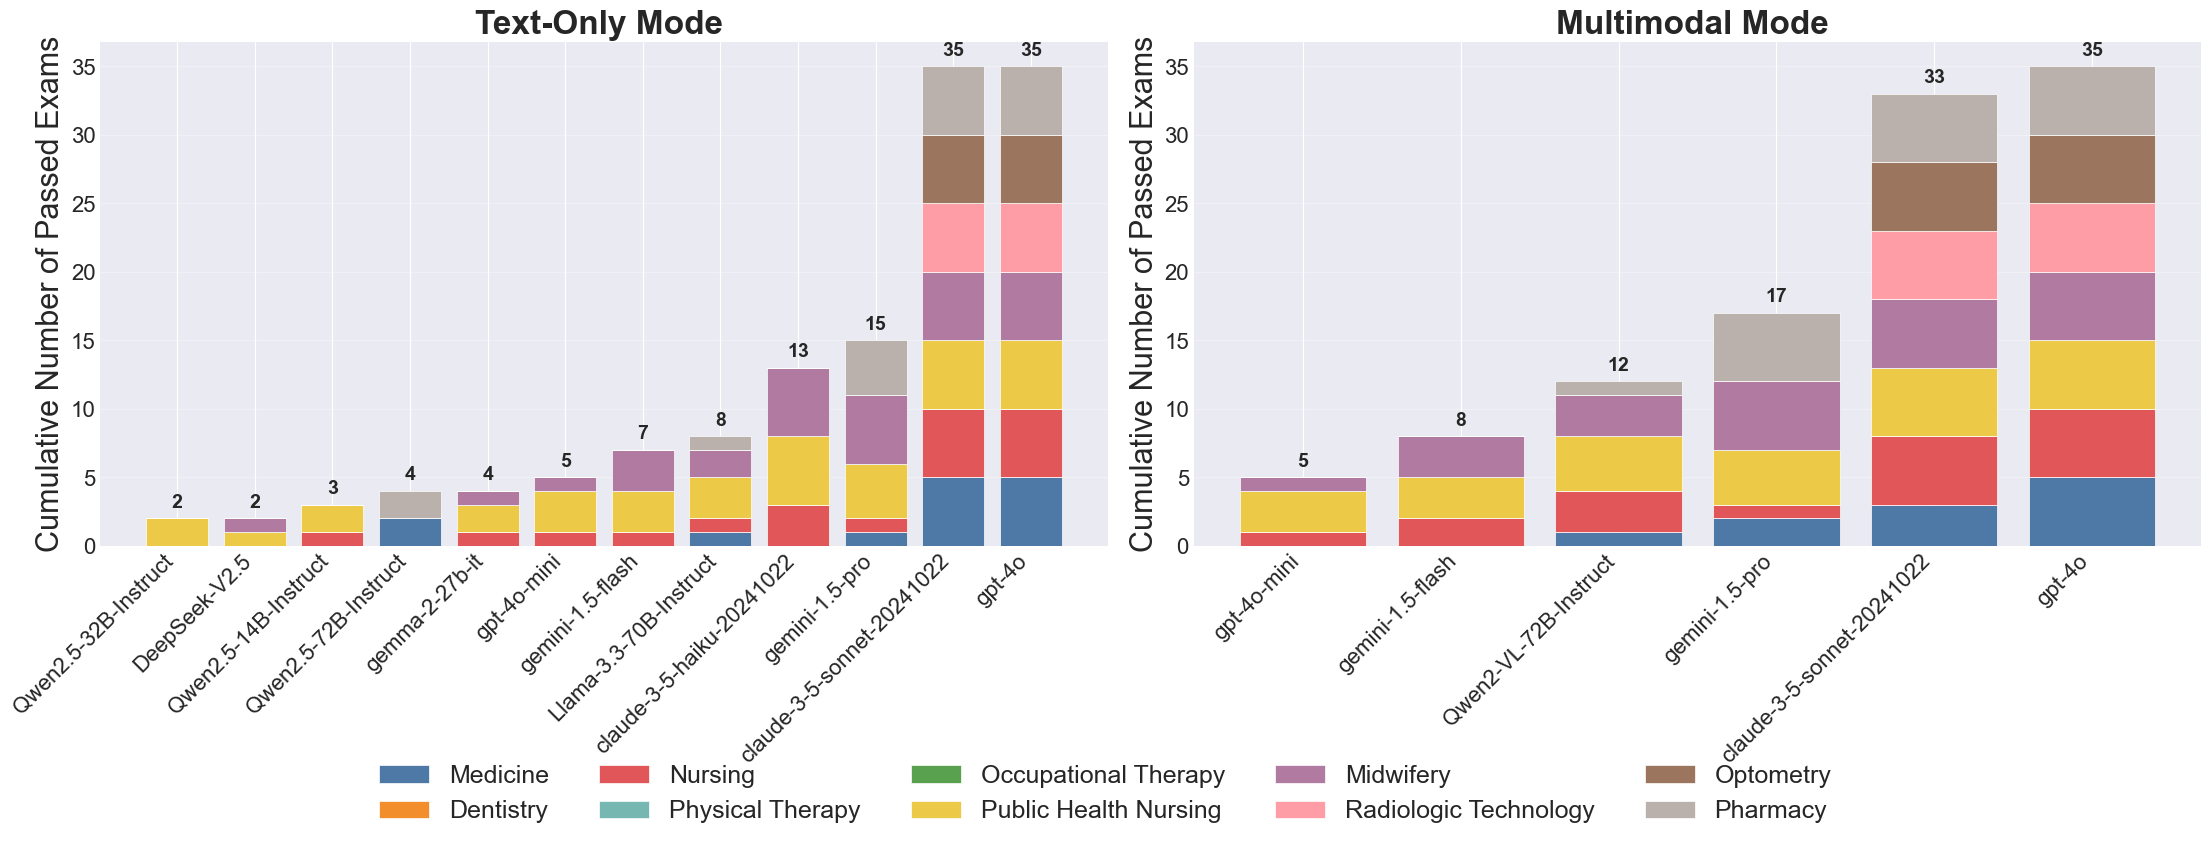

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# 设置中文字体和样式
plt.style.use('seaborn-darkgrid')
rcParams['font.family'] = 'Arial'  # 强制使用 Arial
rcParams['axes.unicode_minus'] = False

# 日文到英文的映射
rename_dict = {
    "医師": "Medicine",
    "歯科": "Dentistry", 
    "看護": "Nursing",
    "理学": "Physical Therapy",
    "作業": "Occupational Therapy",
    "保健": "Public Health Nursing",
    "助産": "Midwifery",
    "診療": "Radiologic Technology",
    "視能": "Optometry",
    "薬剤": "Pharmacy"
}

 

# 创建DataFrame并重命名列
df_text = pd.DataFrame(text_data).rename(columns=rename_dict)
df_multimodal = pd.DataFrame(multimodal_data).rename(columns=rename_dict)

# 选择有分数的模型
df_text_filtered = df_text[df_text['total'] > 0].copy()

# 将 gpt-4o 行移动到最后
df_text_filtered = pd.concat([
    df_text_filtered[df_text_filtered['model'] != 'gpt-4o'],
    df_text_filtered[df_text_filtered['model'] == 'gpt-4o']
])

df_multimodal_filtered = df_multimodal[df_multimodal['total'] > 0].copy()

# 考试科目（排除total列）
subjects = [col for col in df_text_filtered.columns if col not in ['model', 'total']]

colors = [
    '#4E79A7', '#F28E2B', '#E15759', '#76B7B2',
    '#59A14F', '#EDC948', '#B07AA1', '#FF9DA7',
    '#9C755F', '#BAB0AC'
]

# 设置图像大小和风格（并排）
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 8), constrained_layout=True)

# ========================= Text-only 图 =========================
x_pos_text = np.arange(len(df_text_filtered))
bottom_text = np.zeros(len(df_text_filtered))

for i, subject in enumerate(subjects):
    ax1.bar(x_pos_text, df_text_filtered[subject], bottom=bottom_text, 
            color=colors[i], label=subject, edgecolor='white', linewidth=0.5)
    bottom_text += df_text_filtered[subject]

ax1.set_title('Text-Only Mode ', fontsize=24, fontweight='bold')  # 增大标题字体
ax1.set_xlabel(' ', fontsize=22)  # 增大x轴标签字体
ax1.set_ylabel('Cumulative Number of Passed Exams', fontsize=22)  # 增大y轴标签字体
ax1.set_xticks(x_pos_text)
ax1.set_xticklabels(df_text_filtered['model'], rotation=45, ha='right', fontsize=16)  # 增大x轴刻度字体
ax1.tick_params(axis='y', labelsize=16)  # 增大y轴刻度字体
ax1.grid(axis='y', alpha=0.3)

for i, total in enumerate(df_text_filtered['total']):
    ax1.text(i, total + 0.5, str(total), ha='center', va='bottom', fontsize=14, fontweight='bold')  # 增大数值标签字体

# ========================= Multimodal 图 =========================
x_pos_multi = np.arange(len(df_multimodal_filtered))
bottom_multi = np.zeros(len(df_multimodal_filtered))

for i, subject in enumerate(subjects):
    ax2.bar(x_pos_multi, df_multimodal_filtered[subject], bottom=bottom_multi,
            color=colors[i], label=subject, edgecolor='white', linewidth=0.5)
    bottom_multi += df_multimodal_filtered[subject]

ax2.set_title('Multimodal Mode ', fontsize=24, fontweight='bold')  # 增大标题字体
ax2.set_xlabel(' ', fontsize=22)  # 增大x轴标签字体
ax2.set_ylabel('Cumulative Number of Passed Exams', fontsize=22)  # 增大y轴标签字体
ax2.set_xticks(x_pos_multi)
ax2.set_xticklabels(df_multimodal_filtered['model'], rotation=45, ha='right', fontsize=16)  # 增大x轴刻度字体
ax2.tick_params(axis='y', labelsize=16)  # 增大y轴刻度字体
ax2.grid(axis='y', alpha=0.3)

for i, total in enumerate(df_multimodal_filtered['total']):
    ax2.text(i, total + 0.5, str(total), ha='center', va='bottom', fontsize=14, fontweight='bold')  # 增大数值标签字体

# 图例统一放在下方中间，增大字体
fig.legend(subjects, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=5, fontsize=18, frameon=False)  # 增大图例字体

# 显示图像
plt.show()
fig.savefig("50Q_2mode.pdf", bbox_inches='tight')